In [11]:
! pip install yfinance
! pip install yahoo-finance

In [19]:
#active fund analysis comparing actively managed funds to the S&P 500
#goal is to show that it is hard to actively beat the market
#most investors are better off investing in low cost index funds

#import packages
import yahoo_finance as yahoo
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import plotly.express as px
from datetime import datetime

#define start and end dates
start_date = '2013-01-01'
end_date = '2023-12-31'
end_dt = datetime(2023,12,31)
start_dt = datetime(2013,1,1)

#define funds and market indexes
fund_list = ['AVUS','PSR','ARKK','TOTL','PRCOX','STSEX','DREVX','VGWAX','TRULX','JUEAX']
market_index = ['^DJI','^GSPC','^IXIC']

In [13]:
#create dataframes and download data
fund_data = pd.DataFrame(columns=fund_list)
market_data = pd.DataFrame(columns=market_index)

for fund in fund_list:
    fund_data[fund] = yf.download(fund, start_date, end_date)['Adj Close']
for index in market_index:
    market_data[index] = yf.download(index, start_date, end_date)['Adj Close']

#checking for null values
display(fund_data.isnull().sum(), market_data.isnull().sum())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


AVUS     0
PSR      0
ARKK     0
TOTL     0
PRCOX    0
STSEX    0
DREVX    0
VGWAX    0
TRULX    0
JUEAX    0
dtype: int64

^DJI     0
^GSPC    0
^IXIC    0
dtype: int64

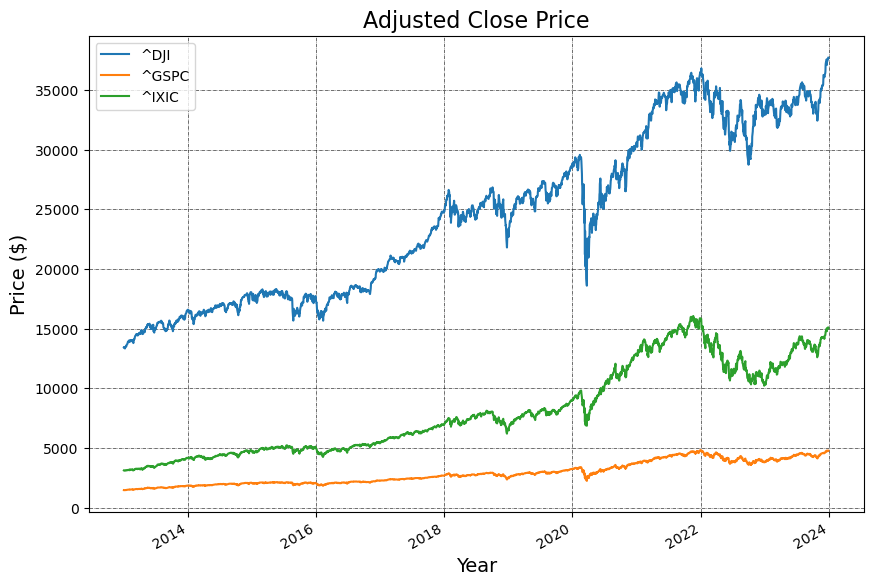

In [14]:
#plot market close prices so we can see their performance
market_data.plot(figsize=(10,7))

plt.legend
plt.title('Adjusted Close Price',fontsize = 16)
plt.ylabel('Price ($)',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.grid(which='major',color='k',linestyle='-.',linewidth=0.4)
plt.show()

In [89]:
#calculating daily, annualized, and cumulative returns for the stocks
fund_daily_returns = fund_data.pct_change()
fund_daily_returns = fund_daily_returns[1:]
fund_annualized_returns = ((1+ fund_daily_returns.mean()) ** 252)-1
fund_cum_returns = (1 + fund_daily_returns).cumprod()-1
fund_cum_returns = fund_cum_returns.reset_index()
fund_total_period_return = fund_cum_returns.iloc[:,1:].tail(1)
fund_total_period_return = fund_total_period_return*100
fund_total_period_return = fund_total_period_return.transpose()

market_daily_returns = market_data.pct_change()
market_daily_returns = market_daily_returns[1:]
market_annualized_returns = ((1+ market_daily_returns.mean()) ** 252)-1
market_annualized_returns_max = market_annualized_returns.max()
market_annualized_returns = market_annualized_returns[market_annualized_returns >= market_annualized_returns_max]
market_cum_returns = (1 + market_daily_returns).cumprod()-1
market_cum_returns = market_cum_returns.reset_index()
market_total_period_return = market_cum_returns.iloc[:,1:].tail(1)
market_total_period_return = market_total_period_return*100
market_total_period_return_max = market_total_period_return.transpose().max()
market_total_period_return = market_total_period_return.transpose()

combined_annual_returns = pd.concat([fund_annualized_returns, market_annualized_returns])
combined_annual_returns = combined_annual_returns.sort_values(ascending=False)*100
combined_total_returns = pd.concat([fund_total_period_return,market_total_period_return])


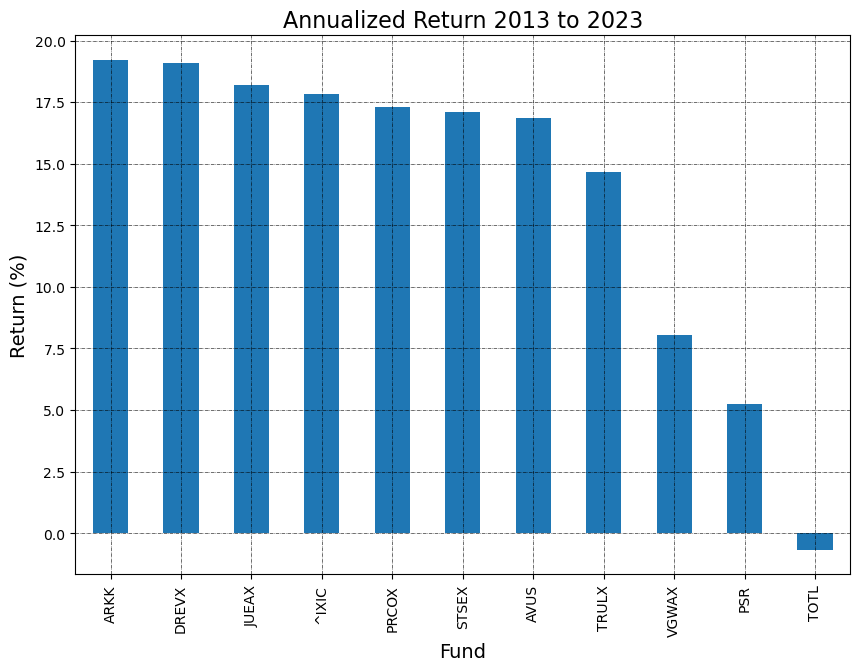

In [66]:
#plot annualized returns for funds and market to see which ones outperform the market
combined_annual_returns.plot.bar(figsize=(10,7))
plt.legend
plt.title('Annualized Return 2013 to 2023',fontsize = 16)
plt.ylabel('Return (%)',fontsize=14)
plt.xlabel('Fund',fontsize=14)
plt.grid(which='major',color='k',linestyle='-.',linewidth=0.4)
plt.show()

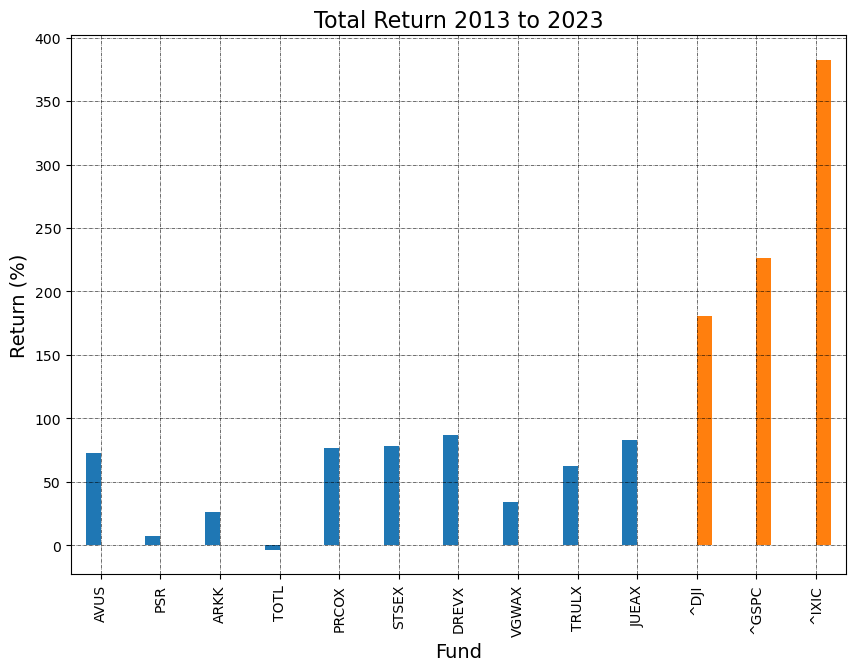

In [88]:
#plot total returns for funds and market to see which ones outperform the market
combined_total_returns.plot.bar(figsize=(10,7), legend=False)
plt.title('Total Return 2013 to 2023',fontsize = 16)
plt.ylabel('Return (%)',fontsize=14)
plt.xlabel('Fund',fontsize=14)
plt.grid(which='major',color='k',linestyle='-.',linewidth=0.4)
plt.show()

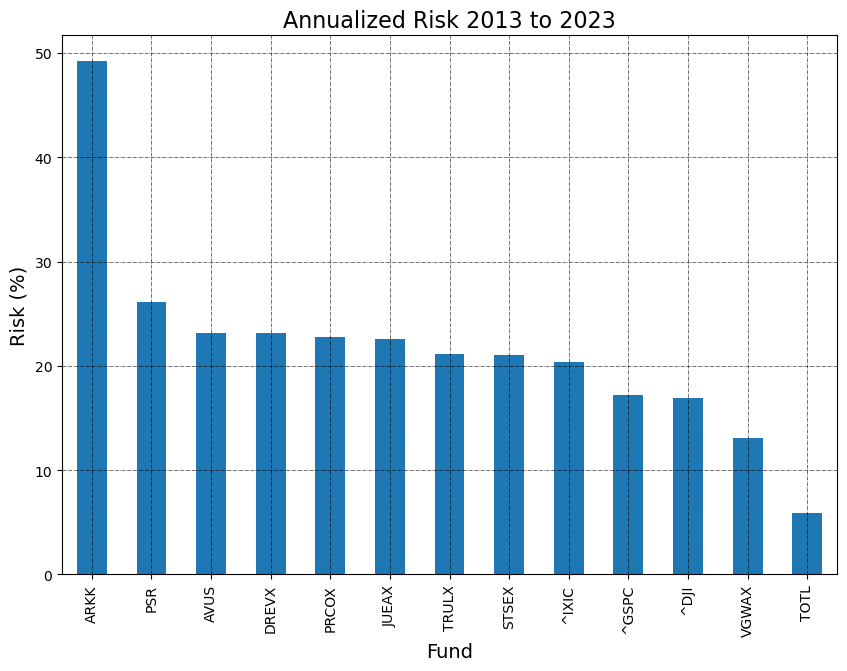

In [98]:
#calculating daily and annualized risk for funds and stocks
fund_risk = fund_daily_returns.std()
market_risk = market_daily_returns.std()
fund_risk_annual = fund_risk * np.sqrt(252)
market_risk_annual = market_risk * np.sqrt(252)

combined_annual_risk = pd.concat([fund_risk_annual, market_risk_annual])
combined_annual_risk = combined_annual_risk.sort_values(ascending=False)*100

#plot annual risk for markets and funds
combined_annual_risk.plot.bar(figsize=(10,7), legend=False)
plt.title('Annualized Risk 2013 to 2023',fontsize = 16)
plt.ylabel('Risk (%)',fontsize=14)
plt.xlabel('Fund',fontsize=14)
plt.grid(which='major',color='k',linestyle='-.',linewidth=0.4)
plt.show()

<Axes: title={'center': 'Sharpe Ratios'}>

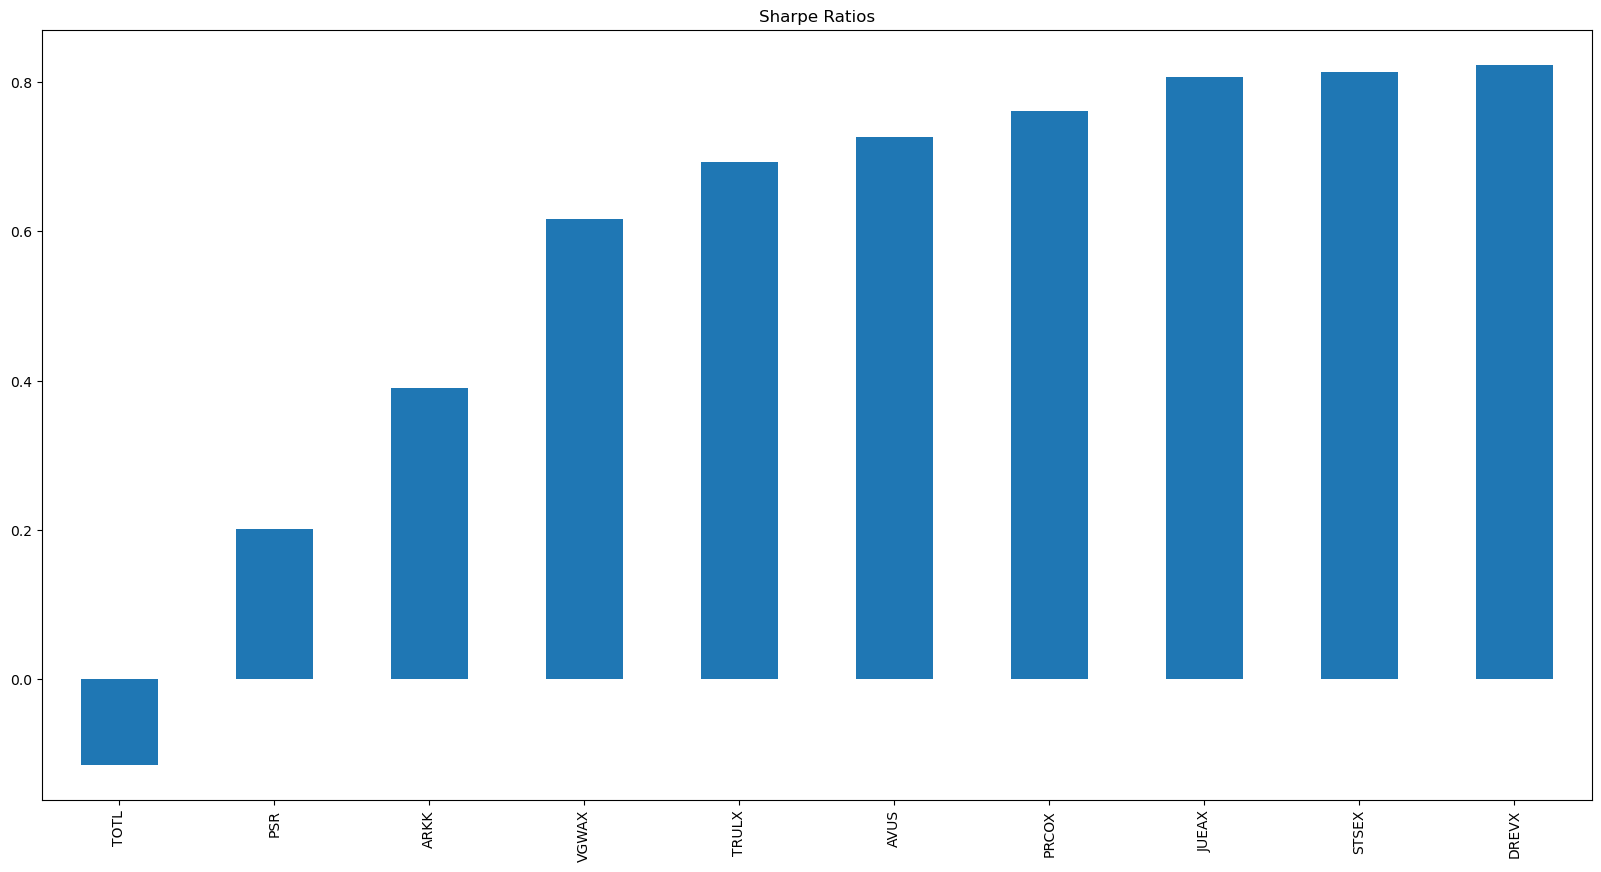

In [99]:
#calculate and show the sharpe ratios using the annualized returns and risk for the funds
sharpe_ratios_fund = fund_annualized_returns/fund_risk_annual
sharpe_ratios_fund = sharpe_ratios_fund.sort_values(ascending=True)
sharpe_ratios_fund.plot(figsize=(20, 10), kind="bar", title="Sharpe Ratios")